## RandomForest Classifier

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import numpy as np
from sklearn.metrics import f1_score

In [2]:
df=pd.read_csv('Company_Data.csv')

## Data analysis

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Checking for any null values

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


### Converting the Target variable "Sales" to Categorical variable 

In [5]:
high=df[df.Sales>=10].index

In [6]:
medium=df[df.Sales>=5][df.Sales<=10].index

/tmp/ipykernel_2647/1668150484.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  medium=df[df.Sales>=5][df.Sales<=10].index


In [7]:
low=df[df.Sales<=5].index

In [8]:
for i in low:
    df.Sales[i]=0

/tmp/ipykernel_2647/2580224809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sales[i]=0


In [9]:
for i in medium:
    df.Sales[i]=1

/tmp/ipykernel_2647/3027914958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sales[i]=1


In [10]:
for i in high:
    df.Sales[i]=2

/tmp/ipykernel_2647/3762621596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sales[i]=2


In [11]:
df.Sales.value_counts()

1.0    244
2.0     79
0.0     77
Name: Sales, dtype: int64

### New dataFrame

In [12]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,2.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0.0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,2.0,138,108,17,203,128,Good,33,14,Yes,Yes
396,1.0,139,23,3,37,120,Medium,55,11,No,Yes
397,1.0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1.0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
en=LabelEncoder()
df.ShelveLoc=en.fit_transform(df.ShelveLoc)
df.Urban=en.fit_transform(df.Urban)
df.US=en.fit_transform(df.US)

In [14]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,2.0,111,48,16,260,83,1,65,10,1,1
2,2.0,113,35,10,269,80,2,59,12,1,1
3,1.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2.0,138,108,17,203,128,1,33,14,1,1
396,1.0,139,23,3,37,120,2,55,11,0,1
397,1.0,162,26,12,368,159,2,40,18,1,1
398,1.0,100,79,7,284,95,0,50,12,1,1


### Train Test Split

In [15]:
xTrain,xTest,yTrain,yTest=train_test_split(df.drop('Sales',axis=1),df.Sales)

### Grid search using only one parameter

In [16]:
scr={}
for i in range(1,30):
    #s=np.ran
    rf=RandomForestClassifier(max_depth=i,criterion='gini',min_samples_split=8,random_state=42)
    rf.fit(xTrain,yTrain)
    preds=rf.predict(xTest)
    print(rf.score(xTest,yTest),rf.score(xTrain,yTrain))
    scr[i]=f1_score(yTest,preds,average='weighted')
    print('F1:',f1_score(yTest,preds,average='weighted'))
max(scr.values())

0.66 0.5933333333333334
F1: 0.5248192771084337
0.67 0.64
F1: 0.5465714285714286
0.67 0.6766666666666666
F1: 0.5465714285714286
0.68 0.7233333333333334
F1: 0.5658861788617886
0.69 0.8
F1: 0.5978925166904707
0.69 0.8533333333333334
F1: 0.6210593064401981
0.72 0.88
F1: 0.6545384615384616
0.7 0.9166666666666666
F1: 0.6330769230769231
0.71 0.94
F1: 0.651916129032258
0.71 0.9633333333333334
F1: 0.6415102246061012
0.72 0.9633333333333334
F1: 0.6646857142857142
0.74 0.97
F1: 0.6911868131868133
0.74 0.97
F1: 0.6911868131868133
0.73 0.9733333333333334
F1: 0.6824305106658047
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0.9733333333333334
F1: 0.6911868131868133
0.74 0

0.6911868131868133

In [17]:
rf=RandomForestClassifier(max_depth=8,criterion='gini',random_state=42)
rf.fit(xTrain,yTrain)
preds=rf.predict(xTest)

In [18]:
f1_score(yTest,preds,average='weighted')

0.662124183006536

We got 66.21% accuracy by using train test split

### Using Kfold to try increase in accuracy

In [19]:
for i in range(1,11):
    kfold=KFold(n_splits=10,shuffle=True,random_state=42)
    model=RandomForestClassifier(max_depth=8,criterion='gini',random_state=42,max_features=i)
    print(np.mean(cross_val_score(model,df.drop('Sales',axis=1),df.Sales,cv=kfold)))

0.64
0.6525000000000001
0.685
0.7
0.7025
0.705
0.705
0.715
0.6975
0.7075


In [122]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
model=RandomForestClassifier(max_depth=8,criterion='gini',random_state=42,max_features=8)
print(np.mean(cross_val_score(model,df.drop('Sales',axis=1),df.Sales,cv=kfold)))

0.715


In [34]:
from sklearn import metrics
model.fit(xTrain,yTrain)
preds=model.predict(xTest)
print(metrics.classification_report(yTest,preds))

              precision    recall  f1-score   support

         0.0       0.75      0.29      0.41        21
         1.0       0.73      0.92      0.82        66
         2.0       0.67      0.46      0.55        13

    accuracy                           0.73       100
   macro avg       0.72      0.56      0.59       100
weighted avg       0.73      0.73      0.70       100



Accuracy increased to 70% !!!

### Using grid search with all parameters in consideration.

###  After some trial error finalized following parameters for optimal parameter search

Parameters:

In [76]:
rfc_estimators=[int(x) for x in np.linspace(100, 1000, 6)]

rfc_criterion=['gini', 'entropy']

rfc_max_depth=[int(x) for x in np.linspace(5, 55, 11)]
rfc_max_depth.append(None)

rfc_min_samples_split=[int(x) for x in np.linspace(2, 10, 9)]

#rfc_min_samples_leaf=[int(x) for x in np.linspace(2, 10, 9)]

#rfc_min_weight_fraction_leaf=[int(x) for x in np.linspace(0, 0.5, 9)]

rfc_max_features=[int(x) for x in np.linspace(5, 10, 9)]

#rfc_max_leaf_nodes=[None,2,5,8,13,20]

rfc_min_impurity_decrease=[float(x) for x in np.linspace(1.5, 10.5, 9)]

#rfc_class_weight=["balanced", 'balanced_subsample']

rfc_ccp_alpha=[float(x) for x in np.linspace(1.0, 105, 9)]

Grid:

In [78]:
rfc_grid = {'n_estimators': rfc_estimators,
               'max_depth': rfc_max_depth,
               'max_features': rfc_max_features,
               'criterion': rfc_criterion,
               'min_samples_split': rfc_min_samples_split,
               'min_impurity_decrease': rfc_min_impurity_decrease,
               #'bootstrap': rfc_bootstrap,
            #'min_samples_leaf':rfc_min_samples_leaf,
          #'min_weight_fraction_leaf':rfc_min_weight_fraction_leaf,
          'max_features':rfc_max_features,
          #'max_leaf_nodes':rfc_max_leaf_nodes,
          'oob_score':rfc_oob_score,
          #'class_weight':rfc_class_weight,
          'ccp_alpha':rfc_ccp_alpha}

Grid search with RandomizedSearch to find best suitable parameters

In [79]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestClassifier()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rfc_grid, 
                               n_iter = 100, cv = 3, verbose = 1, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(xTrain, yTrain)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'oob_score': False,
 'n_estimators': 280,
 'min_samples_split': 4,
 'min_impurity_decrease': 6.0,
 'max_features': 10,
 'max_depth': 10,
 'criterion': 'entropy',
 'ccp_alpha': 1.0}

Creating model with Best parameters

In [98]:
rfc_model=RandomForestClassifier(#oob_score= False,
 n_estimators= 280,
 #min_weight_fraction_leaf= 0,
 min_samples_split= 4,
 #min_samples_leaf= 4,
 min_impurity_decrease= 6.0,
 #max_leaf_nodes= 20,
 max_features= 10,
 max_depth= 10,
 criterion= 'entropy',
 #class_weight= 'balanced',
 ccp_alpha= 1)
 #bootstrap= True)

In [105]:
rfc_model.fit(xTrain,yTrain)
rfc_pred=rfc_model.predict(xTest)

print(metrics.classification_report(rfc_pred,yTest))
print('f1 Score:',f1_score(rfc_pred,yTest,average='weighted'))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.66      0.80       100
         2.0       0.00      0.00      0.00         0

    accuracy                           0.66       100
   macro avg       0.33      0.22      0.27       100
weighted avg       1.00      0.66      0.80       100

f1 Score: 0.7951807228915662


/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Got accuracy of 79.51% and F1 score of 80%!

In [95]:
pd.DataFrame(rfc_pred==yTest).value_counts()

Sales
True     66
False    34
dtype: int64

## RandomForest Regressor

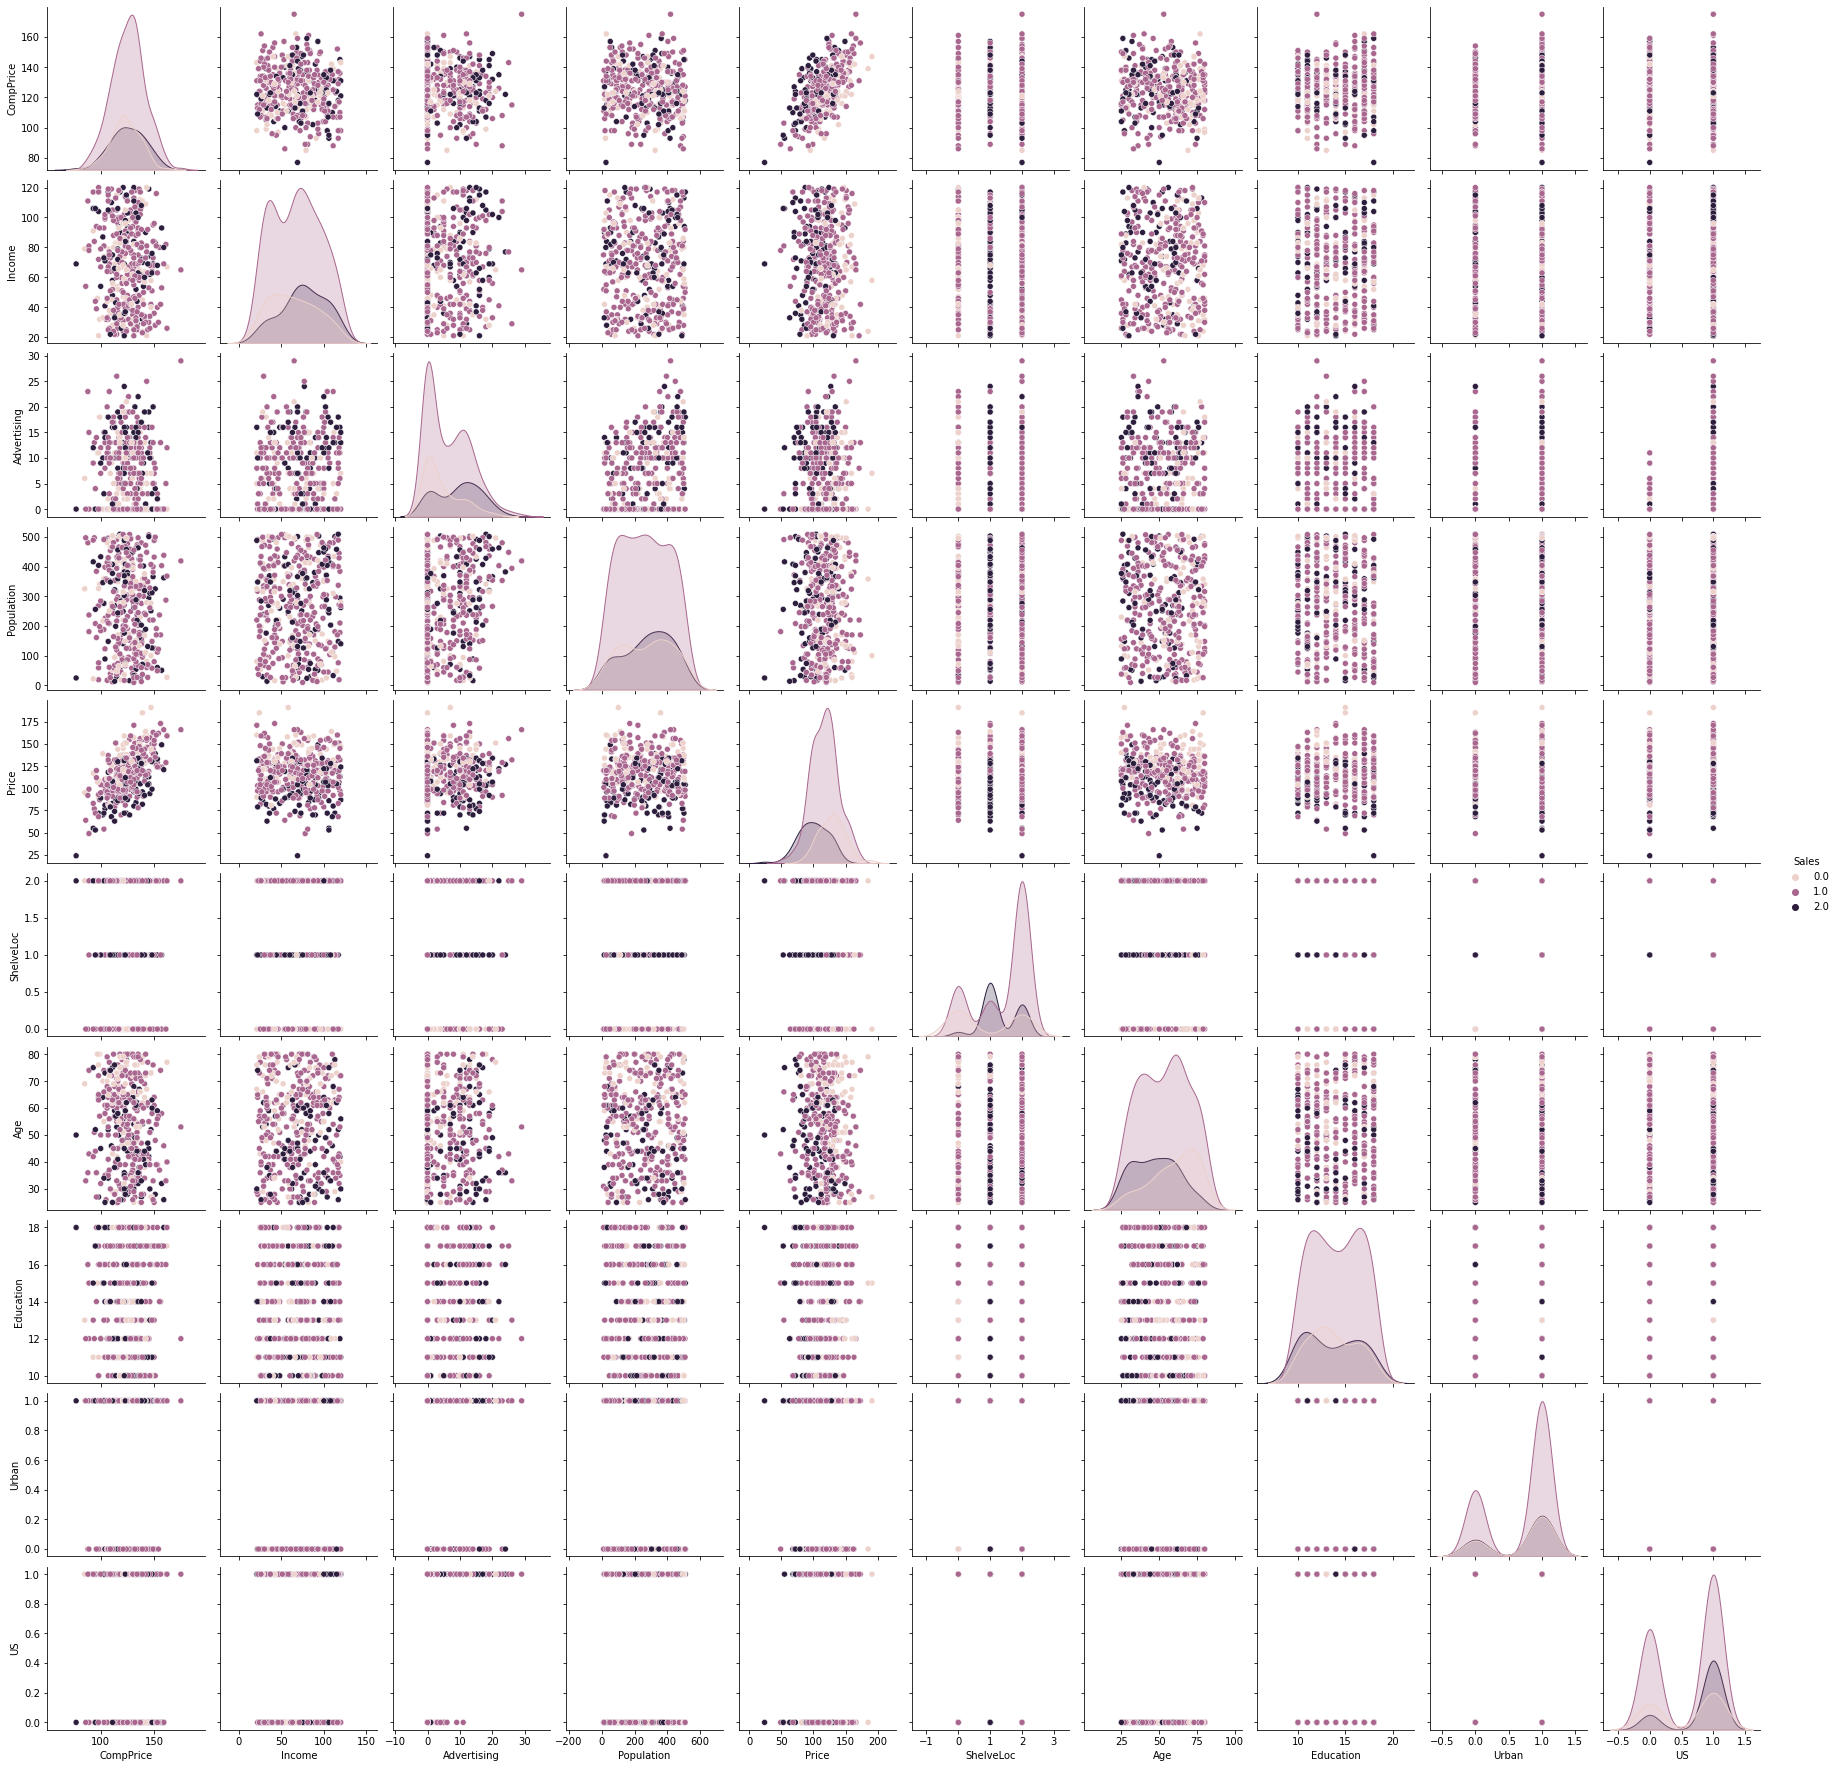

In [127]:
import seaborn as sns
sns.set(style='white')
sns.pairplot(df,hue='Sales')

<AxesSubplot:>

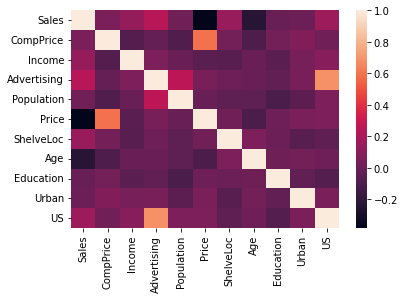

In [185]:
sns.heatmap(df.corr())

In [198]:
from pingouin import multivariate_normality
multivariate_normality(df)

HZResults(hz=1.1884043518148302, pval=5.2016000732065835e-154, normal=False)

Collated all parameters for Grid Search

In [24]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 50, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(xTrain, yTrain)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, criterion=mae, max_depth=30, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, criterion=mse, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=2000; total time=   3.9s
[CV] END bootstrap=False, criterion=mae, max_depth=15, max_features=auto, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   3.8s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=mae, max_depth=40, max_features=log2, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=200; total

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_impurity_decrease': 0.0,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'mse',
 'bootstrap': True}

Creating Model with best parameters

In [113]:
rf_base = RandomForestRegressor(n_estimators= 200,
 min_samples_split= 6,
 min_impurity_decrease= 0.0,
 max_features= 'auto',
 max_depth= None,
 criterion= 'mse',
 bootstrap= True)

rf_base.fit(xTrain,yTrain)
rf_base.score(xTest,yTest)

0.4881636580120121

Accuracy of 48.8%

Predictions:

In [119]:
rfr_preds=rf_base.predict(xTest)
print(rfr_preds)

[1.22343056 0.91754185 1.15825    0.51990476 1.6267877  1.03456349
 1.29570238 1.24066071 1.58421627 1.04371392 1.83099802 1.19800595
 0.42606944 0.89332125 0.99525    1.06333333 0.55830754 0.83356746
 0.80694048 0.6116333  0.18510913 1.29639683 1.4360377  1.52206746
 0.57825198 1.54549206 0.73683514 1.03187302 1.22447421 0.71399982
 1.59222421 0.84929167 0.71523016 0.72444246 1.56787103 0.6937785
 1.11452183 0.8312702  1.11379167 0.54315873 1.461375   1.07461508
 1.65242857 1.39623016 0.94385714 0.91400595 0.62399838 1.15267496
 1.15617442 0.58952976 1.04271429 0.59762933 0.6033869  1.15303571
 1.04424603 1.20747619 0.67886508 0.86993488 0.21169841 0.73477778
 1.24305357 0.82740873 0.69422619 1.61414683 1.21411508 1.12067262
 0.59210317 1.00944246 0.94826407 0.54850613 0.62729365 1.00491306
 0.33334542 0.96704563 0.24031981 0.68078968 1.7320119  0.88106746
 0.99156981 1.09114881 1.01820635 1.01828175 1.66529563 1.1279246
 1.46637302 0.88430195 1.50163095 0.74024802 1.64756349 0.915069

In [159]:
b=rf_base.feature_importances_

<AxesSubplot:>

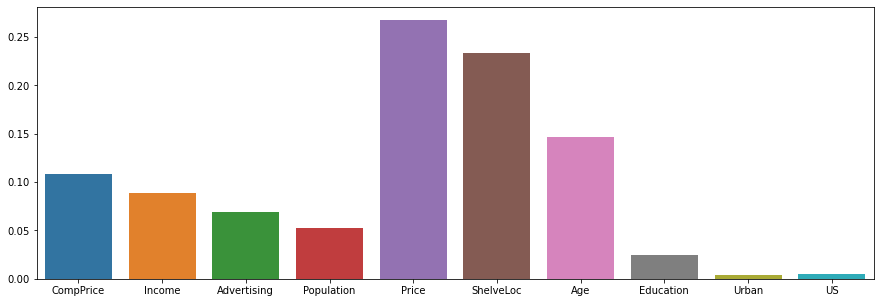

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
sns.barplot(x=df.drop('Sales',axis=1).columns,y=b)

### From above its concluded that Price is the most important feature.